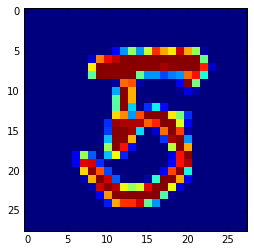

In [16]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Activation, core, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils


(x_train, y_train), (x_test, y_test) = mnist.load_data()

rows, cols = x_train.shape[1],x_train.shape[2]

x_train = x_train.reshape(x_train.shape[0], 1, rows, cols).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 1, rows, cols).astype('float32')/255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

plt.imshow(x_train[4600, 0], interpolation='nearest')
plt.show()

In [22]:
model = Sequential()

model.add(Convolution2D(32, 3, 3,border_mode='valid',input_shape=(1, rows, cols)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(32, 3, 3))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(core.Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(core.Dropout(.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

model.fit(x_train, y_train, batch_size=128, nb_epoch=10,
         show_accuracy=True, verbose=1, validation_split=(.2))

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 812s - loss: 0.2541 - acc: 0.9217 - val_loss: 0.0679 - val_acc: 0.9788
Epoch 2/12
48000/48000 [==============================] - 824s - loss: 0.0987 - acc: 0.9696 - val_loss: 0.0479 - val_acc: 0.9853
Epoch 3/12
48000/48000 [==============================] - 809s - loss: 0.0711 - acc: 0.9782 - val_loss: 0.0488 - val_acc: 0.9870
Epoch 4/12
48000/48000 [==============================] - 809s - loss: 0.0594 - acc: 0.9821 - val_loss: 0.0445 - val_acc: 0.9870
Epoch 5/12
48000/48000 [==============================] - 811s - loss: 0.0516 - acc: 0.9848 - val_loss: 0.0409 - val_acc: 0.9880
Epoch 6/12
48000/48000 [==============================] - 833s - loss: 0.0448 - acc: 0.9861 - val_loss: 0.0419 - val_acc: 0.9880
Epoch 7/12
48000/48000 [==============================] - 862s - loss: 0.0410 - acc: 0.9878 - val_loss: 0.0421 - val_acc: 0.9898
Epoch 8/12
48000/48000 [=======================

In [34]:
loss = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 32s    


In [35]:
print(loss)

0.0296999689169


In [67]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
#y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       980
          1       0.99      1.00      1.00      1135
          2       0.99      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.98      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.98      0.99       974
          9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



('C1 shape : ', (32L, 26L, 26L))


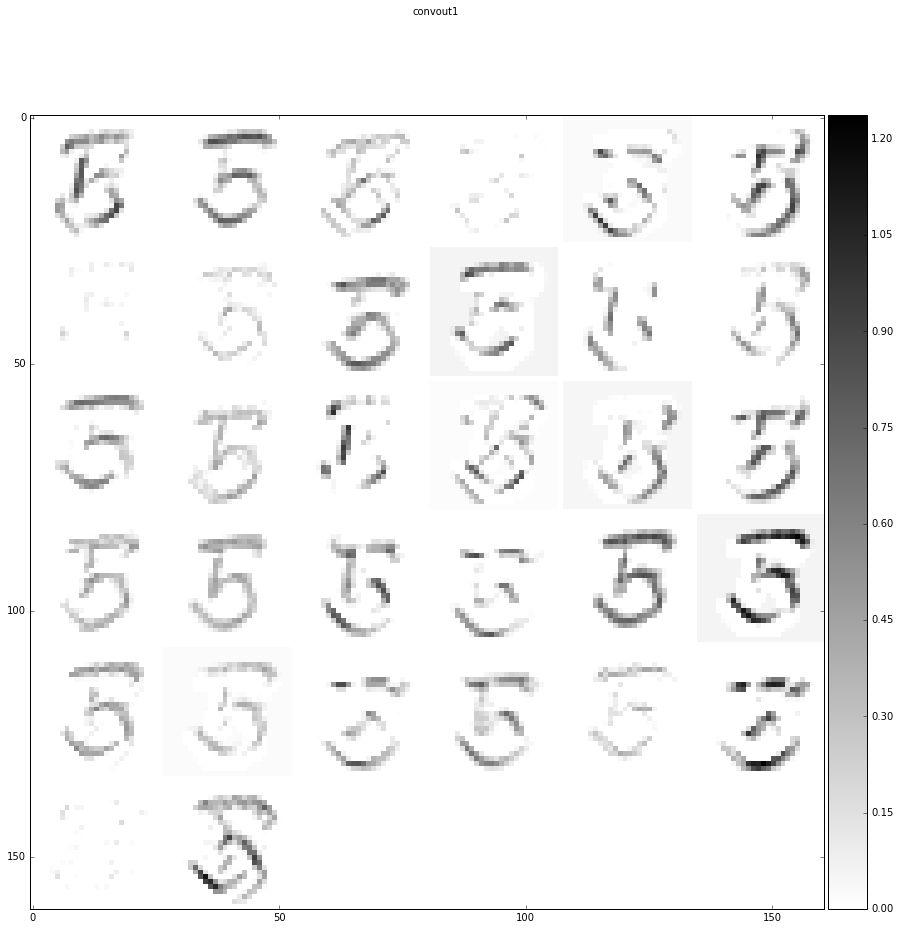

In [91]:
from keras import backend as K
from theano import function
import matplotlib.cm as cm

convout1_f = function([model.get_input(train=False)], convout1.get_output(train=False))
#convout2_f = function([model.get_input(train=False)], convout2.get_output(train=False))

from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)
    
i = 4600    
X = x_train[i:i+1]

# Visualize convolution result (after activation)
C1 = convout1_f(X)
C1 = np.squeeze(C1)
print("C1 shape : ", C1.shape)

plt.figure(figsize=(15, 15))
plt.suptitle('convout1')
nice_imshow(plt.gca(), make_mosaic(C1, 6, 6), cmap=cm.binary)